In [6]:
import femGTopo
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

Nx = 100
Ny = 100
Lx = 1.
Ly = 1.

fem = femGTopo.isoGridFem2D(Nx,Ny,Lx,Ly)
fem.SetElemMat(4,4,1,0.3)
# K,c,v =  fem.GetElemMat()
# v = numpy.linalg.eigvals(K)
# v.sort()


# a=  [1,2,3]
# a.extend(list(numpy.reshape(K,(-1))))
# b = a[0:4]
# b[0] = 3

fix = numpy.zeros((Ny+1,Nx+1))
fx = numpy.zeros_like(fix)
fy = numpy.zeros_like(fix)
fix *= numpy.nan
fix[:,0] = 0
fy[-1,:] = 1.0/Nx
# fix[((fem.xm - 5)**2 + (fem.ym - 1)**2) <= 0.6012 ** 2] = 0.0001
rho = numpy.ones((Ny, Nx))
# rho[((fem.xcm - 5)**2 + (fem.ycm - 1)**2) <= 0.6012 **2] = 0



fem.setBCs(fix, fx, fy)
fem.AssembleKbLocal()




In [7]:

fem.setRho(rho)
fem.AssembleRhoAb()

fem.SolveU()
fem.GetStress()




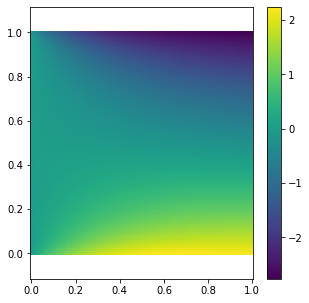

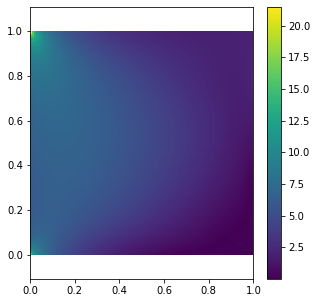

In [8]:
sz = 5

plt.figure(0)
scale = 1e-100
plt.pcolor(fem.xm + fem.uarray * scale, fem.ym +
           fem.varray * scale, fem.uarray, shading='auto')
plt.colorbar()
plt.axis("equal")
f = plt.gcf()
f.set_size_inches(sz, sz)

plt.figure(1)
plt.pcolor(fem.xcm, fem.ycm, fem.VM * fem.rho, shading='auto')
plt.colorbar()
plt.axis("equal")
f = plt.gcf()
f.set_size_inches(sz, sz)
xcm = fem.xcm
ycm = fem.ycm
plt.show()


In [ ]:
import numpy
A = numpy.random.randn(10,10)
print(numpy.argmax(A,))
idx = numpy.unravel_index(numpy.argmax(A), A.shape)
print(A[idx],numpy.max(A))


In [ ]:


import femGTopo
import numpy
import numpy.linalg
import matplotlib.pyplot as plt

Nx = 100
Ny = 100
Lx = 1.
Ly = 1.


pVM = 1000
femF = femGTopo.isoGridFem2DOptFun(pVM,Nx,Ny,Lx,Ly)
fix = numpy.zeros((Ny+1,Nx+1))
fx = numpy.zeros_like(fix)
fy = numpy.zeros_like(fix)
fix *= numpy.nan
fix[:,0] = 0
fx[:,-1] = 1.0/Ny
# fix[((fem.xm - 5)**2 + (fem.ym - 1)**2) <= 0.6012 ** 2] = 0.0001
rho = numpy.ones((Ny, Nx))
# rho[((femF.xcm - 0.5)**2 + (femF.ycm - 0.5)**2) <= 0.3 **2] = 0.001


femF.SetElemMat()
femF.setBCs(fix, fx, fy)
femF.AssembleKbLocal()
femF.Eval(rho)

ddrho = femF.dPI_VMdrho
ddVM  = femF.dPI_VMdVM


VM0=femF.PI_VM
print(numpy.max(femF.VM), femF.PI_VM)


plt.figure(2)
plt.pcolor(femF.xcm, femF.ycm, femF.dPI_VMdrho, shading='auto')
plt.colorbar()
plt.axis("equal")
f = plt.gcf()
f.set_size_inches(8,4)




In [ ]:


LR0 = 1e-3
rho += femF.dPI_VMdrho * LR0 / femGTopo.Pnorm(femF.dPI_VMdrho, 2.0)
femF.Eval(rho)
VM1=femF.PI_VM
print(femF.PI_VM,(VM1-VM0)/LR0)




plt.figure(2)
plt.pcolor(femF.xcm, femF.ycm, femF.dPI_VMdrho, shading='auto')
plt.colorbar()
plt.axis("equal")
f = plt.gcf()
f.set_size_inches(8,4)






In [ ]:

import femGTopo
import numpy
import numpy.linalg
import matplotlib.pyplot as plt
from IPython import display

Nx = 25
Ny = 25
Lx = 1.
Ly = 1.

pVM = 30

fix = numpy.zeros((Ny+1,Nx+1))
fx = numpy.zeros_like(fix)
fy = numpy.zeros_like(fix)
fix *= numpy.nan
fix[:,0] = 0
fy[-1,:] = 1.0/Nx

opter = femGTopo.topoStressOptimizer()
opter.InitFunc(fix,fx,fy,nx=Nx,ny=Ny,Lx=Lx,Ly=Ly,pVM=pVM)
opter.InitRho(0.5)

print(opter.femF.PI_VM)


In [ ]:
for iter in range(100):
    opter.Step(10)
    print("generation[%d] PI_VM = %.8g MAX_INC %g"%(iter,opter.femF.PI_VM, opter.MgradValid))
    # plt.figure(2)
    # plt.clf()
    # plt.pcolor(opter.femF.xcm, opter.femF.ycm, opter.rho, shading='auto')
    # plt.colorbar()
    # plt.axis("equal")
    # f = plt.gcf()
    # f.set_size_inches(8,4)
    # display.display(plt.gcf())
    # display.clear_output(wait=True)
    


In [ ]:
plt.figure(2)
plt.pcolor(opter.femF.xcm, opter.femF.ycm, opter.rho, shading='auto')
plt.colorbar()
plt.axis("equal")
f = plt.gcf()
f.set_size_inches(8,4)
    

# Using pyoptsparse

In [1]:
import pyoptsparse
import numpy
import matplotlib.pyplot as plt
import scipy
import scipy.sparse
import femGTopo

Nx = 25
Ny = 25

vset = 0.5

pVM = 1000
femF = femGTopo.isoGridFem2DOptFun(pVM, Nx, Ny,1., 1.)
fix = numpy.zeros((Ny + 1, Nx + 1))
fx = numpy.zeros_like(fix)
fy = numpy.zeros_like(fix)
fix *= numpy.nan
fix[:, 0] = 0
fx[:, -1] = 1.0 / Ny
rho = numpy.ones((Ny, Nx)) * 0.5


femF.SetElemMat()
femF.setBCs(fix, fx, fy)
femF.AssembleKbLocal()
femF.Eval(rho)
print(femF.PI_VM)

def objfuncs(xdict):
    rho = numpy.array(xdict["rho"]).reshape((Ny, Nx),order="C")
    femF.EvalVM(rho)

    funcs = {}
    funcs["PI_VM"] = femF.PI_VM
    funcs["vol"] = numpy.mean(rho)

    fail = False
    # print("===Call obj")
    return funcs, fail

def sensfuncs(xdict, fdict):
    sens = {}
    rho = numpy.array(xdict["rho"]).reshape((Ny, Nx),order="C")
    femF.EvalVMdiff(rho)
    sens["PI_VM"] = {}
    sens["PI_AB"] = {}

    sens["PI_VM"]["rho"] = femF.dPI_VMdrho.reshape((1,Nx*Ny),order="C")
    sens["PI_AB"]["rho"] = femF.dPI_ABdrho.reshape((1,Nx*Ny),order="C")
    # print("===Call sens")

    
    # plt.figure(2)
    # plt.clf()
    # plt.pcolor(opter.femF.xcm, opter.femF.ycm, opter.rho, shading='auto')
    # plt.colorbar()
    # plt.axis("equal")
    # f = plt.gcf()
    # f.set_size_inches(8,4)
    # display.display(plt.gcf())
    # display.clear_output(wait=True)

    return sens


opt = pyoptsparse.Optimization("FEMGTOPO",objFun=objfuncs)

opt.addVarGroup(
    "rho",
    nVars=Nx * Ny,
    varType="c",
    value=vset,
    lower=0.0,
    upper=1.0,
    scale=1.0,
    offset=0.0,
)

opt.addConGroup(
    "vol",
    nCon=1,
    lower=vset,
    upper=vset,
    scale=1.0,
    linear=True,
    jac={"rho": numpy.ones((1, Nx * Ny))/(Nx*Ny)},
)

opt.addObj(name="PI_VM" )

print(opt)

options = {}
options['print_level']=5
options['tol'] = 1e-8
options['max_iter'] = 500
opter = pyoptsparse.OPT("IPOPT", options = options)

/home/harry/anaconda3/envs/DL/lib/python3.9/site-packages/pyoptsparse/pyOpt_MPI.py:68: UserWarning: mpi4py could not be imported. mpi4py is required to use the parallel gradient analysis and parallel objective analysis for non-gradient based optimizers. Continuing using a dummy MPI module from pyOptSparse.
  warnings.warn(warn)


21.036380721278515


Optimization Problem -- FEMGTOPO
    Objective Function: objfuncs


   Objectives
      Index  Name             Value
          0  PI_VM     0.000000E+00

   Variables (c - continuous, i - integer, d - discrete)
      Index  Name      Type      Lower Bound            Value      Upper Bound     Status
          0  rho_0        c     0.000000E+00     5.000000E-01     1.000000E+00           
          1  rho_1        c     0.000000E+00     5.000000E-01     1.000000E+00           
          2  rho_2        c     0.000000E+00     5.000000E-01     1.000000E+00           
          3  rho_3        c     0.000000E+00     5.000000E-01     1.000000E+00           
          4  rho_4        c     0.000000E+00     5.000000E-01     1.000000E+00           
          5  rho_5        c     0.000000E+00     5.000000E-01     1.000000E+00           
          6  rho_6        c     0.000000E+00     5.000000E-01     1.000000E+00           
          7  rho_7        c     0.000000E+00   

In [2]:
sol = opter(opt, sens=sensfuncs)


List of user-set options:

                                    Name   Value                used
                        file_print_level = 5                     yes
                   hessian_approximation = limited-memory        yes
                           linear_solver = mumps                 yes
                                max_iter = 500                   yes
                             output_file = IPOPT.out             yes
                             print_level = 5                     yes
                      print_user_options = yes                   yes
                                      sb = yes                   yes
                                     tol = 1e-08                 yes
This is Ipopt version 3.14.4, running with linear solver MUMPS 5.2.1.

Number of nonzeros in equality constraint Jacobian...:      625
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of va

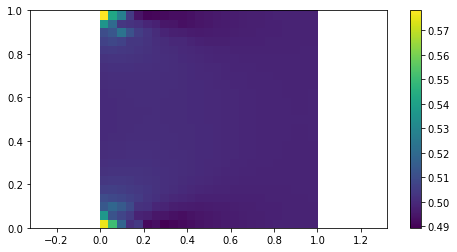

In [3]:
dvdict = sol.getDVs()
rho = dvdict['rho'].reshape((Ny,Nx))
plt.figure(2)
plt.clf()
plt.pcolor(femF.xcm, femF.ycm, rho, shading='auto')
plt.colorbar()
plt.axis("equal")
f = plt.gcf()
f.set_size_inches(8,4)
